# CSC model band and dos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT = '/Users/jonathanlu/Documents'
MAT = 'tvGr'
KMAT = 'Gr'
THETA = 8.0
REL_PATH = f'{ROOT}/{MAT}/bands/t{THETA}'
DREL_PATH = f'{ROOT}/{MAT}/dos/t{THETA}'

In [3]:
k_mags_path = f'{REL_PATH}/kmags.npy'
evals_path = f'{DREL_PATH}/evals.npy'
dos_path = f'{DREL_PATH}/dos.npy'

In [4]:
k_mags = np.load(k_mags_path)
evals = np.sort(np.load(evals_path), axis=1)
# evals[:,1] += 2
signs = -1*(evals < -5e-1) + 1*(evals >= -5e-1)
modes = np.sqrt(np.abs(evals))*signs
nmodes = evals.shape[1]
print(k_mags.shape)
print(signs.shape)

dos = np.load(dos_path)

(301,)
(301, 84)


In [5]:
min_mode, max_mode = np.min(modes), np.max(modes)
ndos = len(dos)
omegas = np.linspace(min_mode, max_mode, ndos)

<Figure size 432x288 with 0 Axes>

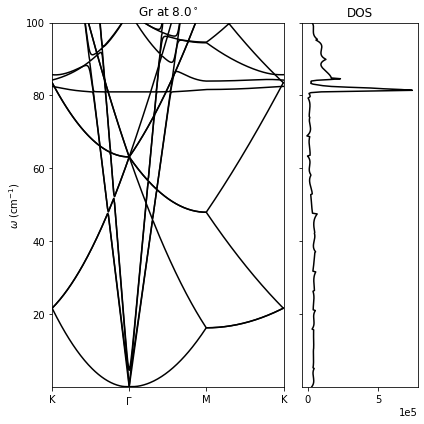

In [23]:
# Plot the CSC modes above the Koshino modes 
plt.clf()
fig, [axband, axdos] = plt.subplots(nrows=1, ncols=2, 
                                    sharey=True, figsize=(6,6),
                                    gridspec_kw={'width_ratios': [3, 1.5]})
plt.ylim(bottom=np.min(modes), top=100)

axband.set_title(rf"Gr at {THETA}$^\circ$")
# for i in range(len(evals)):
#     axband.scatter([i]*len(modes[i]), modes[i], c='black')
axband.plot(modes, c='black')
axband.set_xlim(left=0, right=301)
axband.set_xticks([0,100,200,301])
axband.set_xticklabels(['K', r'$\Gamma$', 'M', 'K'])
axband.set_ylabel(r'$\omega$ (cm$^{-1}$)')

axdos.plot(dos, omegas/7.7, c='black')
axdos.set_title("DOS")
axdos.ticklabel_format(axis='x', style='sci', scilimits=(5,6))

plt.tight_layout()
# plt.savefig(f"{ROOT}/data_mlph/overlay_{THETA}.pdf")
plt.show()